## Classification using convolusion neural network

### Import modules

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img, img_to_array, array_to_img
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense
from keras.models import Sequential
import os

### Load dataset


In [9]:
train_cardboard_dir = 'sample_data/cardboard'
train_glass_dir = 'sample_data/glass'
train_metal_dir = 'sample_data/metal'
train_paper_dir = 'sample_data/paper'
train_plastic_dir = 'sample_data/plastic'
train_trash_dir = 'sample_data/trash'

train_cardboard_names = os.listdir(train_cardboard_dir)
train_glass_names = os.listdir(train_glass_dir)
train_metal_names = os.listdir(train_metal_dir)
train_paper_names = os.listdir(train_paper_dir)
train_plastic_names = os.listdir(train_plastic_dir)
train_trash_names = os.listdir(train_trash_dir)

train_cardboard_files = [train_cardboard_dir + '/' + name for name in train_cardboard_names]
train_glass_files = [train_glass_dir + '/' + name for name in train_glass_names]
train_metal_files = [train_metal_dir + '/' + name for name in train_metal_names]
train_paper_files = [train_paper_dir + '/' + name for name in train_paper_names]
train_plastic_files = [train_plastic_dir + '/' + name for name in train_plastic_names]
train_trash_files = [train_trash_dir + '/' + name for name in train_trash_names]

print('cardboard:', len(train_cardboard_files))
print('glass:', len(train_glass_files))
print('metal:', len(train_metal_files))
print('paper:', len(train_paper_files))
print('plastic:', len(train_plastic_files))
print('trash:', len(train_trash_files))

cardboard: 403
glass: 501
metal: 410
paper: 594
plastic: 482
trash: 137


### Image preview

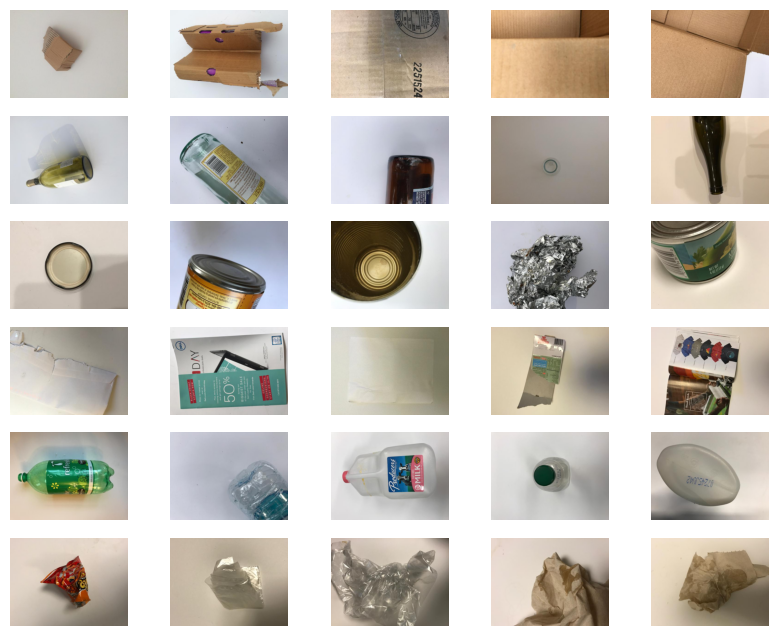

In [10]:
fig, axes = plt.subplots(6, 5, figsize=(10, 8))
ax = np.reshape(axes, -1)

for i, path in enumerate(train_cardboard_files[:5] + train_glass_files[:5] + train_metal_files[:5] + train_paper_files[:5] + train_plastic_files[:5] + train_trash_files[:5]):
  img = plt.imread(path)
  ax[i].axis('off')
  ax[i].imshow(img)
plt.show()

### Set the model

In [11]:
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(300, 300, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(6, activation='softmax'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 298, 298, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 149, 149, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 147, 147, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 73, 73, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 71, 71, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 35, 35, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 33, 33, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       8,389,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │           3,078 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,452,710 (32.24 MB)

 Trainable params: 8,452,710 (32.24 MB)

 Non-trainable params: 0 (0.00 B)

### Compile the model

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Preprocess image data

In [16]:
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'sample_data/',
    target_size=(300, 300),
    batch_size=128,
    classes=['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash'],
    class_mode='categorical'
)

valid_generator = train_datagen.flow_from_directory(
    'sample_data/',
    target_size=(300, 300),
    batch_size=128,
    classes=['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash'],
    class_mode='categorical'
)

history = model.fit(
    train_generator,
    steps_per_epoch=15,
    epochs=30,
    verbose=1,
    validation_data=valid_generator,  # <- 추가
    validation_steps=4
)

Found 2527 images belonging to 6 classes.
Found 2527 images belonging to 6 classes.
Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 12s 808ms/step - accuracy: 0.6602 - loss: 0.9308 - val_accuracy: 0.6836 - val_loss: 0.8895
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 352ms/step - accuracy: 0.6442 - loss: 0.9379 - val_accuracy: 0.6797 - val_loss: 0.9121
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 15s 760ms/step - accuracy: 0.6725 - loss: 0.8502 - val_accuracy: 0.7129 - val_loss: 0.8169
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 281ms/step - accuracy: 0.6790 - loss: 0.8796 - val_accuracy: 0.7207 - val_loss: 0.7595
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.6975 - loss: 0.8085 - val_accuracy: 0.7695 - val_loss: 0.6716
Epoch 6/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 339ms/step - accuracy: 0.7540 - loss: 0.6605 - val_accuracy: 0.7246 - val_loss: 0.7030
Epoch 7/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.7608 - loss: 0.6964 - val_accuracy: 0.7949 - val_loss: 0.5609
Epoch 8/30
15/15 ━━━━━

### Evaluate model performance

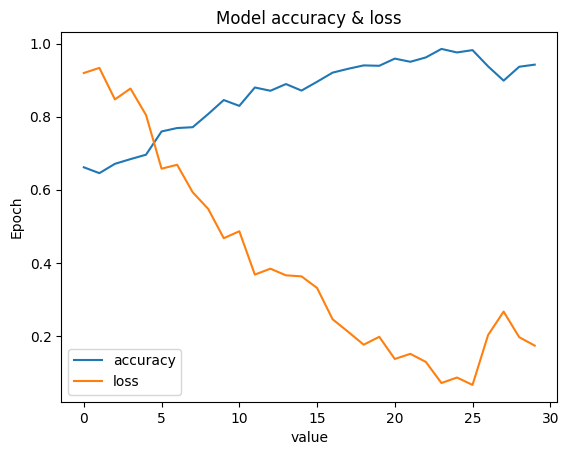

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model accuracy & loss')
plt.xlabel('value')
plt.ylabel('Epoch')
plt.legend(['accuracy', 'loss'], loc='best')
plt.show()